In [2]:
import numpy as np
import cv2
import os
import time
from matplotlib import pyplot as plt
from tqdm import tqdm
import glob
frames_dir = 'preprocessed-frames'
output_dir = 'bg-detection-frames'

In [5]:
bg_subtractor = cv2.createBackgroundSubtractorMOG2(varThreshold=16, detectShadows=False)

In [ ]:
output_dir="bg-detection-for-binary-maps"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i in tqdm(range(250, 350)):
    frame = cv2.imread(f"{frames_dir}/frame{i}.jpg")
    img_sub = bg_subtractor.apply(frame)

    cv2.imwrite(f"{output_dir}/frame{i}.jpg", img_sub)    


100%|██████████| 100/100 [00:24<00:00,  4.03it/s]


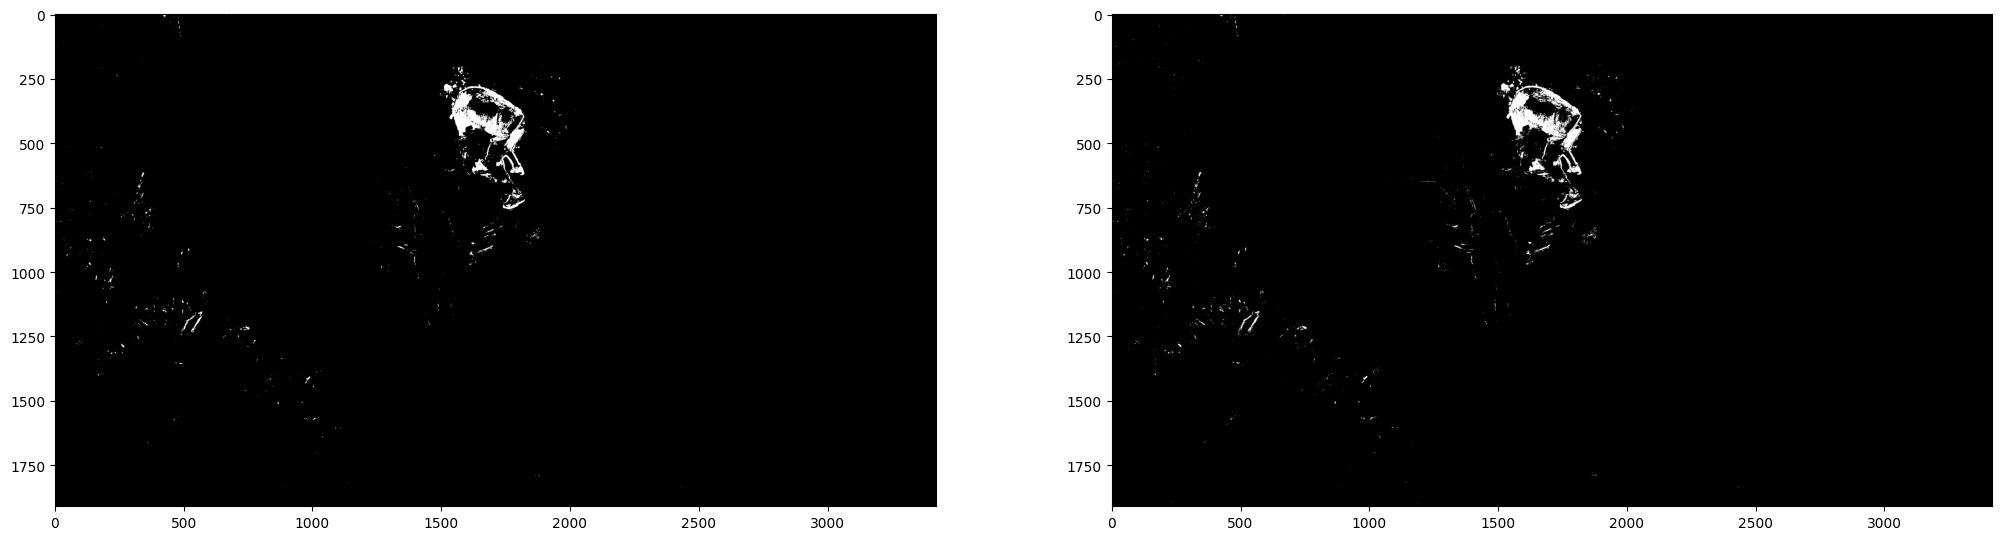

In [14]:
frame_num=264

frame = cv2.imread(f"bg-detection-for-binary-maps/frame{frame_num}.jpg")
#_, thresh = cv2.threshold(frame,min_thresh,255,cv2.THRESH_BINARY)
#motion_mask = cv2.medianBlur(thresh, 3)
 
# morphological operations
frame_modified = cv2.morphologyEx(frame, cv2.MORPH_OPEN, np.array((9,9), dtype=np.uint8), iterations=1)
frame_modified = cv2.morphologyEx(frame_modified, cv2.MORPH_CLOSE, np.array((9,9), dtype=np.uint8), iterations=1)

fig, ax = plt.subplots(1, 2, figsize=(25, 15))
ax[0].imshow(frame_modified)
ax[1].imshow(frame, cmap='gray') 
